In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
CurrentPath = os.getcwd()
sndata = pd.read_csv(CurrentPath + '/2025/Field_research/Data/parsonage.txt', sep = ' ', engine='python')

In [2]:
# observed data
mb = sndata['mb'].values
dmb = sndata['dmb'].values
z = sndata['zcmb'].values

# 1. SN data

## 1-1. Flat LCDM

In [59]:
import sys
sys.path.append('./2025/Field_research/Utils')
from utils_flat import *
import multiprocess as mp

In [68]:
def run_mcmc_test(seed):
    np.random.seed(seed)
    Prior1 = np.array([[0.],[1.]])
    normal_vec = np.array([0.0003])*10
    std = np.array([0])*0.1
    paraminit = np.array([0.9999742233029345]) + np.random.normal(0,std)
    nstep = int(2e6)
    return MCMC(Other_stuff_flat, paraminit, sndata, nstep, normal_vec, Prior1)

In [ ]:
n_chain = 4
with mp.Pool(processes=n_chain) as pool:
    results = pool.map(run_mcmc_test, range(n_chain))

accept_ratio = 0.27444444444444444
Best_fit = Omega_m : 0.9999999139197914, likelihood = -1649.1671470002043
std = 0.0005363350279307531


(array([3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        3.000e+00, 4.000e+00, 0.000e+00, 7.000e+00, 4.000e+00, 6.000e+00,
        2.400e+01, 5.000e+00, 2.700e+01, 6.000e+00, 5.000e+00, 1.300e+01,
        9.000e+00, 1.900e+01, 1.500e+01, 3.000e+01, 2.200e+01, 2.800e+01,
        1.900e+01, 4.400e+01, 4.400e+01, 7.000e+01, 6.700e+01, 6.700e+01,
        9.800e+01, 1.780e+02, 1.060e+02, 2.220e+02, 2.540e+02, 3.350e+02,
        3.020e+02, 4.420e+02, 2.940e+02, 4.940e+02, 7.900e+02, 7.820e+02,
        1.167e+03, 1.194e+03]),
 array([0.99536849, 0.99546112, 0.99555375, 0.99564638, 0.99573901,
        0.99583164, 0.99592426, 0.99601689, 0.99610952, 0.99620215,
        0.99629478, 0.99638741, 0.99648003, 0.99657266, 0.99666529,
        0.99675792, 0.99685055, 0.99694318, 0.9970358 , 0.99712843,
        0.99722106, 0.99731369, 0.99740632, 0.99749895, 0.99759158,
        0.9976842 , 0.99777683, 0.99

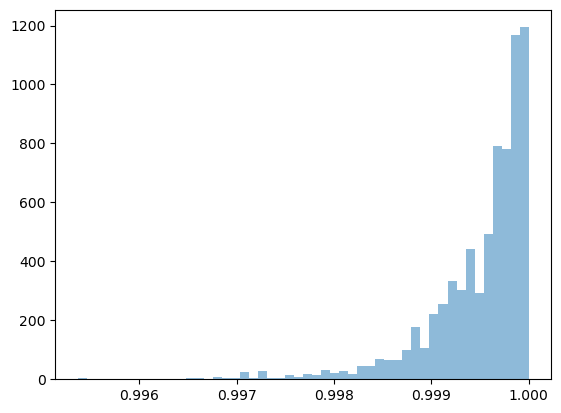

In [67]:
burn_in = 200
MCMC_test = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)
#MCMC_test = MCMC_test[:,200:]
accept_ratio = np.unique(MCMC_test).shape[0] / (2e3*4-200*4)

Best_fit = MCMC_test[:,np.argmax(MCMC_test[-1])]
std = np.std(MCMC_test[0])
print(f'accept_ratio = {accept_ratio}')
print(f'Best_fit = Omega_m : {Best_fit[0]}, likelihood = {Best_fit[-1]}')
print(f'std = {std}')
plt.hist(MCMC_test[0],bins=50,alpha=0.5, label='Omega_m')

In [ ]:
def run_mcmc_fin(seed):
    np.random.seed(seed)
    Prior1 = np.array([[0.],[1.]])
    normal_vec = np.array([1.3357049031167966e-06])*0.02
    std = np.array([0])
    paraminit = np.array([5.95230321791345e-6]) + np.random.normal(0,std)
    nstep = int(1.6*1e6)
    return MCMC(Other_stuff_flat, paraminit, sndata, nstep, normal_vec, Prior1)
n_chain = 4
with mp.Pool(processes=n_chain) as pool:
    results = pool.map(run_mcmc_fin, range(n_chain))
for i in range(n_chain):
    np.save(f'./2025/FIeld_research/Results/MCMC_flat_SN_{i}.npy', results[i])

accept_ratio = 1.5515515515515516e-05
Best_fit = Omega_m : 6.994986292104164e-16
std = 1.2455454298147975e-12


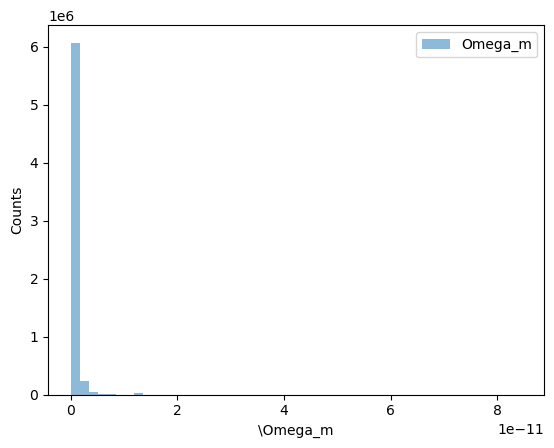

In [48]:
results = np.load('./2025/FIeld_research/Results/MCMC_flat_SN_0.npy'),np.load('./2025/FIeld_research/Results/MCMC_flat_SN_1.npy'),np.load('./2025/FIeld_research/Results/MCMC_flat_SN_2.npy'), np.load('./2025/FIeld_research/Results/MCMC_flat_SN_3.npy')
burn_in = 2000
MCMC_fin = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)
accept_ratio = np.unique(MCMC_fin).shape[0] / (2e6*4-burn_in*4)

Best_fit = MCMC_fin[:,np.argmax(MCMC_fin[-1])]
std = np.std(MCMC_fin[0])
print(f'accept_ratio = {accept_ratio}')
print(f'Best_fit = Omega_m : {Best_fit[0]}')
print(f'std = {std}')
plt.hist(MCMC_fin[0],bins=50,alpha=0.5, label='Omega_m')
plt.xlabel(r'\Omega_m')
plt.ylabel('Counts')
plt.legend()
plt.savefig('./2025/Field_research/Results/MCMC_flat_SN.png', dpi=300, bbox_inches='tight')

## 1-2. Curved LCDM

In [2]:
import sys
sys.path.append('./2025/Field_research/Utils')
from utils_curved import *

In [3]:
import multiprocess as mp

In [4]:
def run_mcmc_test(seed):
    np.random.seed(seed)
    Prior2 = np.array([[0., 0.],[4.5, 4.5]])
    std = np.array([0.7765663, 0.5880332])
    normal_vec = np.array([1., 0.2])
    paraminit = np.array([2.5,  2.5]) + np.random.normal(0,std)
    nstep = int(2e3)
    return MCMC(Other_stuff_curved, paraminit, sndata, nstep, normal_vec, Prior2)


n_chain = 4
with mp.Pool(processes=n_chain) as pool:
    results = pool.map(run_mcmc_test, range(n_chain))

  0%|                                                                                                                                                               | 1/2000 [00:00<03:26,  9.66it/s]/Users/john1256/KASI_Ms/2025/Field_research/Utils/utils_curved.py:21: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  grid_Ez = np.array([quad_vec(E_inverse_curved, 0,n, args=(Omegam, Omegalamb))[0] for n in grid])
  0%|▊                                                                                                                                                             | 10/2000 [00:00<00:48, 41.00it/s]/Users/john1256/KASI_Ms/2025/Field_research/Utils/utils_curved.py:42: RuntimeWarning: invalid value encountered in log10
  Bval = 5*np.log10((1+z)*func(z, parm))
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████

In [5]:
burn_in = 200
MCMC_test = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)

accept_ratio = 0.2203125
Best_fit = Omega_m : 3.500353981464437, Omegalamb : 0.0036442760265020663, likelihood = -495.9158697224908
std = [0.07739254 0.05915566]


Text(0.5, 1.0, 'MCMC result for Flat LCDM')

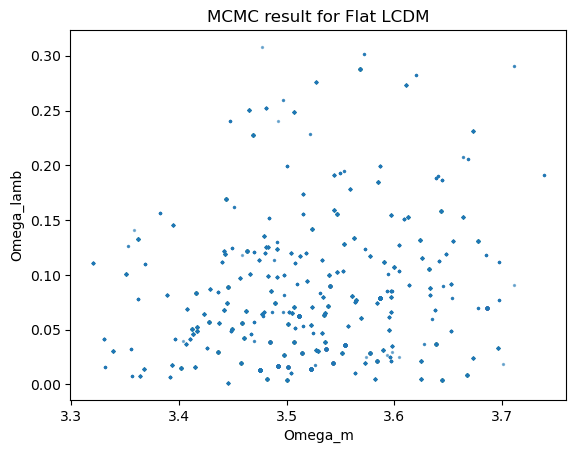

In [6]:
accept_ratio = np.unique(MCMC_test).shape[0] / (1e3*4-burn_in*4)
Best_fit = MCMC_test[:,np.argmax(MCMC_test[-1])]
std = np.std(MCMC_test[0:2], axis=1)
print(f'accept_ratio = {accept_ratio}')
print(f'Best_fit = Omega_m : {Best_fit[0]}, Omegalamb : {Best_fit[1]}, likelihood = {Best_fit[-1]}')
print(f'std = {std}')
plt.scatter(MCMC_test[0], MCMC_test[1], s=2, alpha=0.5)
plt.xlabel('Omega_m')
plt.ylabel('Omega_lamb')
plt.title('MCMC result for Flat LCDM')

In [ ]:
results = np.load(f'./2025/FIeld_research/Results/MCMC_curved_SN_0.npy'), np.load(f'./2025/FIeld_research/Results/MCMC_curved_SN_1.npy'), np.load(f'./2025/FIeld_research/Results/MCMC_curved_SN_2.npy'), np.load(f'./2025/FIeld_research/Results/MCMC_curved_SN_3.npy')
burn_in = 2000
MCMC_fin = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)
nstep = MCMC_fin.shape[1]
accept_ratio = np.unique(MCMC_fin).shape[0] / (nstep)
Best_fit = MCMC_fin[:,np.argmax(MCMC_fin[-1])]
std = np.std(MCMC_fin[0:2], axis=1)
print(f'accept_ratio = {accept_ratio}')
print(f'Best_fit = Omega_m : {Best_fit[0]}, Omegalamb : {Best_fit[1]}')
print(f'std = {std}')
plt.scatter(MCMC_fin[0], MCMC_fin[1], s=2, alpha=0.5)
plt.xlabel(r'$\Omega_m$')
plt.ylabel(r'$\Omega_\Lambda$')
plt.title(r'MCMC result SN for Curved $\Lambda$ CDM')
plt.savefig('MCMC_result_curved_LCDM.png')

# 2. SN + BAO data

In [10]:
# BAO data
BAO_z = np.array([0.0115,0.157,0.389,0.389,0.536,0.536,0.626,0.626])
BAO_val = np.array([0.08,1906.18,3905.35,43.56,4761.80,50.83,5175.36,57.19])
BAO_err = np.array([0.003,66.577,58.667,1.310,68.866,1.531,77.639,1.336])
BAO_ind = np.array([1,2,3,4,3,4,3,4]) 
# 1 : r_s/D_V, 2 : D_V(r_d,fid/r_d), 3 : D_M(r_d,fid/r_d), 4 : H(r_d/r_d,fid)
BAO_data = pd.DataFrame({
    'z': BAO_z,
    'val': BAO_val,
    'err': BAO_err,
    'ind': BAO_ind
})

## 2-1. Flat LCDM

In [7]:
import sys
import os
sys.path.append('./2025/Field_research/Utils')
from utils_flat_BAO import *
import multiprocess as mp

In [8]:
def run_mcmc_test(seed):
    np.random.seed(seed)
    Prior2 = np.array([[0., 4.66594018],[1, 36.39070654]])
    std = np.array([0., 0.57213598])
    normal_vec = np.array([0.0003, 0.11904393])*0.5
    paraminit = np.array([0.9999742233029345,  22.850391597263012]) + np.random.normal(0,std)
    nstep = int(1e3)
    return MCMC_BAO(Other_stuff_flat, BAO_flat, paraminit, sndata,BAO_data, nstep, normal_vec, Prior2)



In [11]:
n_chain = 4
with mp.Pool(processes=n_chain) as pool:
    results = pool.map(run_mcmc_test, range(n_chain))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:24<00:00, 11.84it/s]
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '


/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '


In [12]:
burn_in = 200
MCMC_test = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)

accept_ratio = 0.25458333333333333
Best_fit = Omega_m : 0.9999990774219152, Omegalamb : 23.011655914960812, likelihood = -26590.206722111277
std = [5.48053797e-05 3.75201541e-02]


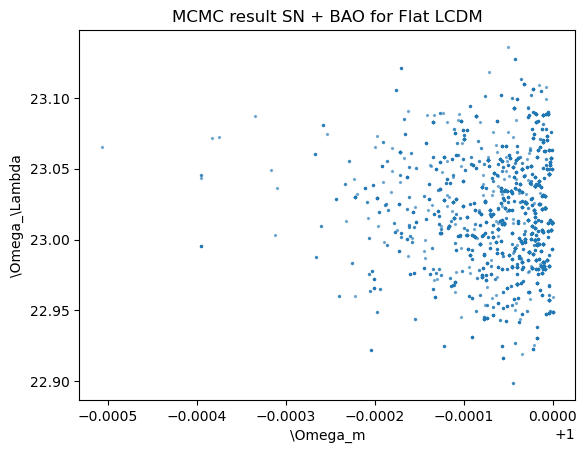

In [13]:
accept_ratio = np.unique(MCMC_test).shape[0] / (4*2e3-4*burn_in)
Best_fit = MCMC_test[:,np.argmax(MCMC_test[-1])]
std = np.std(MCMC_test[0:2], axis=1)
print(f'accept_ratio = {accept_ratio}')
print(f'Best_fit = Omega_m : {Best_fit[0]}, Omegalamb : {Best_fit[1]}, likelihood = {Best_fit[-1]}')
print(f'std = {std}')
plt.scatter(MCMC_test[0], MCMC_test[1], s=2, alpha=0.5)
plt.xlabel(r'\Omega_m')
plt.ylabel(r'\Omega_\Lambda')
plt.title('MCMC result SN + BAO for Flat LCDM')
plt.savefig('./2025/Field_research/Results/MCMC_flat_BAO.png', dpi=300, bbox_inches='tight')

In [ ]:
# real analysis
results = np.load(f'./2025/FIeld_research/Results/MCMC_flat_BAO_0.npy'), np.load(f'./2025/FIeld_research/Results/MCMC_flat_BAO_1.npy'), np.load(f'./2025/FIeld_research/Results/MCMC_flat_BAO_2.npy'), np.load(f'./2025/FIeld_research/Results/MCMC_flat_BAO_3.npy')
burn_in = 1000
MCMC_test = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)
accept_ratio = np.unique(MCMC_test).shape[0] / (4*2e3-4*burn_in)
Best_fit = MCMC_test[:,np.argmax(MCMC_test[-1])]
std = np.std(MCMC_test[0:2], axis=1)
print(f'accept_ratio = {accept_ratio}')
print(f'Best_fit = Omega_m : {Best_fit[0]}, Omegalamb : {Best_fit[1]}')
print(f'std = {std}')
plt.scatter(MCMC_test[0], MCMC_test[1], s=2, alpha=0.5)
plt.xlabel(r'\Omega_m')
plt.ylabel(r'\Omega_\Lambda')
plt.title('MCMC result SN + BAO for Flat LCDM')
plt.savefig('./2025/Field_research/Results/MCMC_flat_BAO.png', dpi=300, bbox_inches='tight')

## 2-2. Curved LCDM

In [14]:
import sys
sys.path.append('./2025/Field_research/Utils')
from utils_curved_BAO import *
import multiprocess as mp

In [25]:
def run_mcmc_test(seed):
    np.random.seed(seed)
    Prior2 = np.array([[0.,0., 4.66594018],[20,20, 35.39070654]])
    std = np.array([0.2096627, 0.13929603, 2.945705])
    normal_vec = np.array([0.5, 0.1, 2])*0.1
    paraminit = np.array([2.2850259759879665,  1.8996327503089998,22]) + np.random.normal(0,std)
    nstep = int(3e3)
    return MCMC_BAO(Other_stuff_curved, BAO_curved, paraminit, sndata,BAO_data, nstep, normal_vec, Prior2)

In [26]:
n_chain = 4
with mp.Pool(processes=n_chain) as pool:
    results = pool.map(run_mcmc_test, range(n_chain))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [06:39<00:00,  7.50it/s]
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There a

In [23]:
burn_in = 400
MCMC_test = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)

accept_ratio = 0.24333333333333335
Best_fit = Omega_m : 4.998551917615714, Omegalamb : 1.4787913638097219, H0 : 15.453394816176552, loglikelihood = -9675.3686206171
std = [0.00223642 0.09329975 0.05927189]


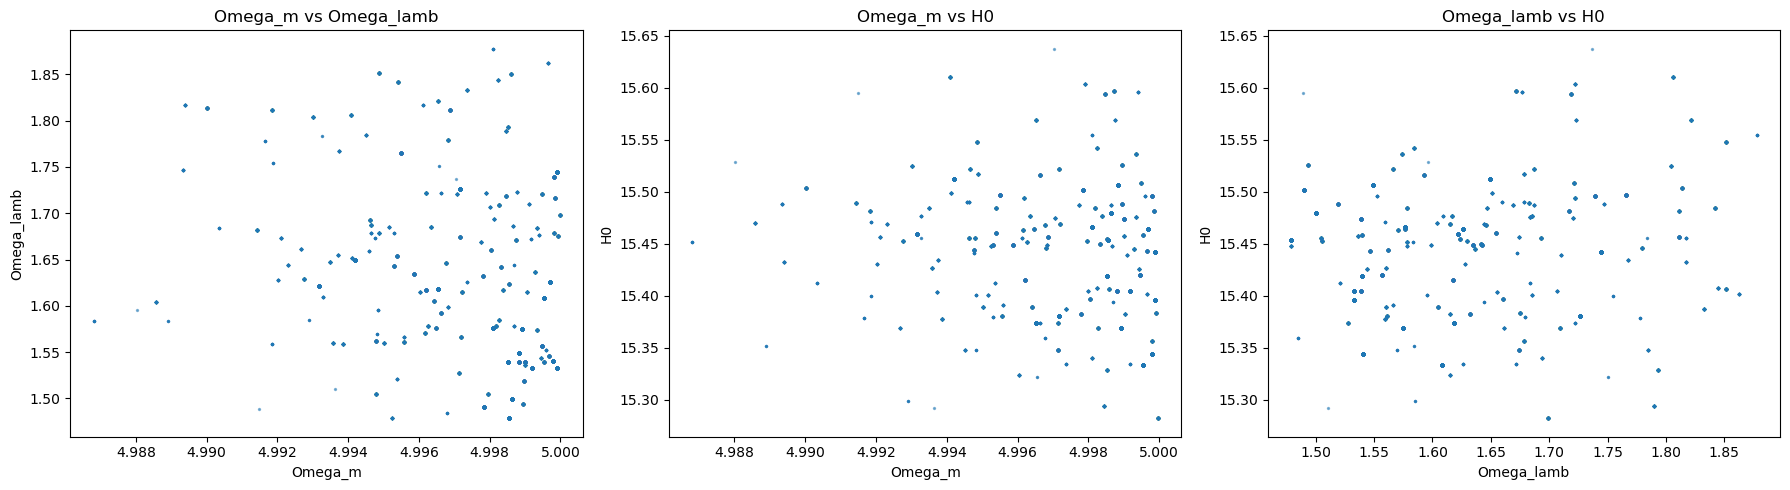

In [24]:
accept_ratio = np.unique(MCMC_test).shape[0] / (4e3-burn_in*4)
Best_fit = MCMC_test[:,np.argmax(MCMC_test[-1])]
std = np.std(MCMC_test[0:3], axis=1)
print(f'accept_ratio = {accept_ratio}')
print(f'Best_fit = Omega_m : {Best_fit[0]}, Omegalamb : {Best_fit[1]}, H0 : {Best_fit[2]}, loglikelihood = {Best_fit[-1]}')
print(f'std = {std}')
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# 1. Omega_m vs Omega_lamb
axs[0].scatter(MCMC_test[0], MCMC_test[1], s=2, alpha=0.5)
axs[0].set_xlabel('Omega_m')
axs[0].set_ylabel('Omega_lamb')
axs[0].set_title('Omega_m vs Omega_lamb')

# 2. Omega_m vs H0
axs[1].scatter(MCMC_test[0], MCMC_test[2], s=2, alpha=0.5)
axs[1].set_xlabel('Omega_m')
axs[1].set_ylabel('H0')
axs[1].set_title('Omega_m vs H0')

# 3. Omega_lamb vs H0
axs[2].scatter(MCMC_test[1], MCMC_test[2], s=2, alpha=0.5)
axs[2].set_xlabel('Omega_lamb')
axs[2].set_ylabel('H0')
axs[2].set_title('Omega_lamb vs H0')

plt.tight_layout()
plt.show()

In [31]:
def run_mcmc_fin(seed):
    np.random.seed(seed)
    Prior2 = np.array([[0.,0., 4.66594018],[2.5,2.5, 36.39070654]])
    std = np.array([5.35304356e-07, 8.92840011e-07,0.01])
    normal_vec = np.array([4.51219990e-06, 8.92060889e-06, 0.5])*0.07
    paraminit = np.array([0.1380254152198886,  1.4134037103696058,36.38747348820103]) + np.random.normal(0,std)
    nstep = int(2*1e5)
    return MCMC(Other_stuff_curved, BAO_curved, paraminit, sndata,BAO_data, nstep, normal_vec, Prior2)

In [ ]:
n_chain = 4
with mp.Pool(processes=n_chain) as pool:
    results = pool.map(run_mcmc_fin, range(n_chain))
for i in range(n_chain):
    np.save(f'./2025/FIeld_research/Results/MCMC_curved_SN+BAO_{i}.npy', results[i])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [5:55:47<00:00,  9.37it/s]
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There a

In [9]:
results = np.load(f'./2025/FIeld_research/Results/MCMC_curved_SN+BAO_0.npy'), np.load(f'./2025/FIeld_research/Results/MCMC_curved_SN+BAO_1.npy'), np.load(f'./2025/FIeld_research/Results/MCMC_curved_SN+BAO_2.npy'), np.load(f'./2025/FIeld_research/Results/MCMC_curved_SN+BAO_3.npy')
burn_in = 1000
MCMC_fin = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)

accept_ratio = 0.10811683417085427
Best_fit = Omega_m : 0.13802555176344997, Omegalamb : 1.4134039721922746, H0 : 36.38837588817553
std = [3.60712819e-07 5.99805217e-07 1.75398599e-02]


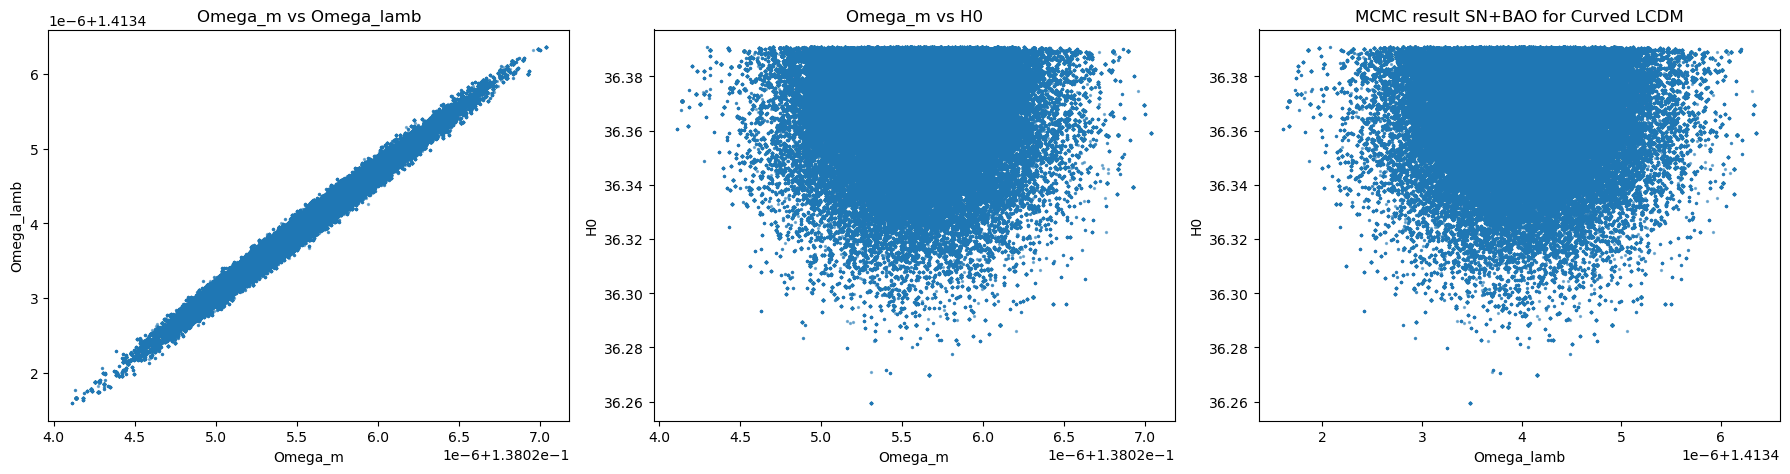

In [25]:
accept_ratio = np.unique(MCMC_fin[0:2]).shape[0] / (4*2*1e5-burn_in*4)
Best_fit = MCMC_fin[:,np.argmax(MCMC_fin[-1])]
std = np.std(MCMC_fin[0:3], axis=1)
print(f'accept_ratio = {accept_ratio}')
print(f'Best_fit = Omega_m : {Best_fit[0]}, Omegalamb : {Best_fit[1]}, H0 : {Best_fit[2]}')
print(f'std = {std}')
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# 1. Omega_m vs Omega_lamb
axs[0].scatter(MCMC_fin[0], MCMC_fin[1], s=2, alpha=0.5)
axs[0].set_xlabel('Omega_m')
axs[0].set_ylabel('Omega_lamb')
axs[0].set_title('Omega_m vs Omega_lamb')

# 2. Omega_m vs H0
axs[1].scatter(MCMC_fin[0], MCMC_fin[2], s=2, alpha=0.5)
axs[1].set_xlabel('Omega_m')
axs[1].set_ylabel('H0')
axs[1].set_title('Omega_m vs H0')

# 3. Omega_lamb vs H0
axs[2].scatter(MCMC_fin[1], MCMC_fin[2], s=2, alpha=0.5)
axs[2].set_xlabel('Omega_lamb')
axs[2].set_ylabel('H0')
axs[2].set_title('Omega_lamb vs H0')
plt.title('MCMC result SN+BAO for Curved LCDM')
plt.tight_layout()
plt.savefig('MCMC_result_curved_LCDM_SN+BAO.png')
plt.show()

In [4]:
import os
os.getcwd()

'/Users/john1256/KASI_Ms'